# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
#function

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the two variables have significantly different ranges, with GRE ranging from 220 - 800 and GPA ranging from 2.3 - 4.0.

#### Question 4. Drop data points with missing data


In [7]:
df_dropped = df_raw.dropna()
df_dropped.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: After applying .dropna() to df_raw and saving to df_dropped, using .describe() to review summary statistics we can see there are three fewer observations in admit and all quartiles populating across variables.   

#### Question 6. Create box plots for GRE and GPA

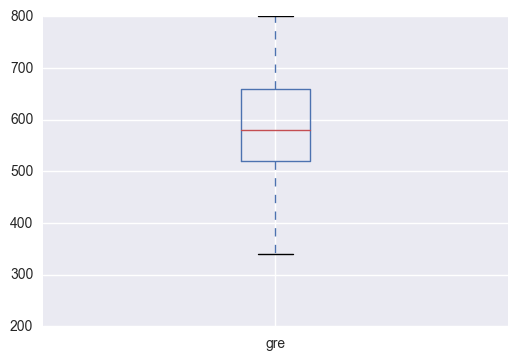

In [8]:
#boxplot 1
df_dropped['gre'].plot(kind = 'box')

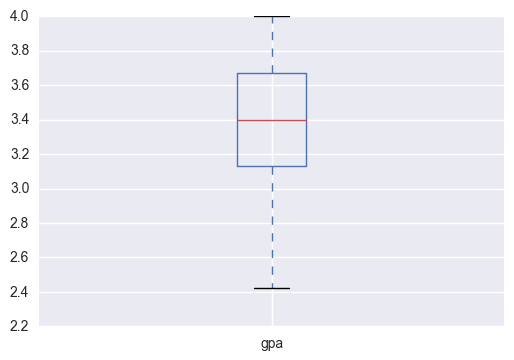

In [9]:
#boxplot 2 
df_dropped['gpa'].plot(kind = 'box')

#### Question 7. What does this plots show?

Answer: Min = 2.26, first quartile = 3.13, median = 3.40, third quartile = 3.67, IQR

#### Question 8. Describe each distribution 

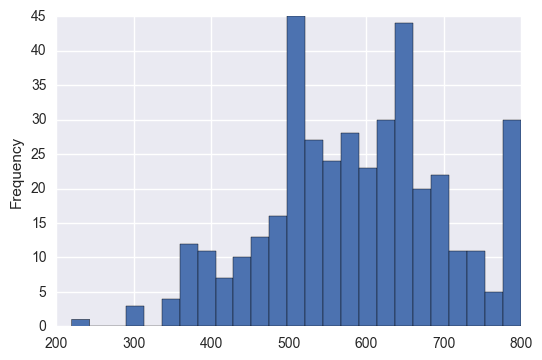

In [10]:
# plot the distribution of each variable 
df_dropped['gre'].plot.hist(bins = 25)

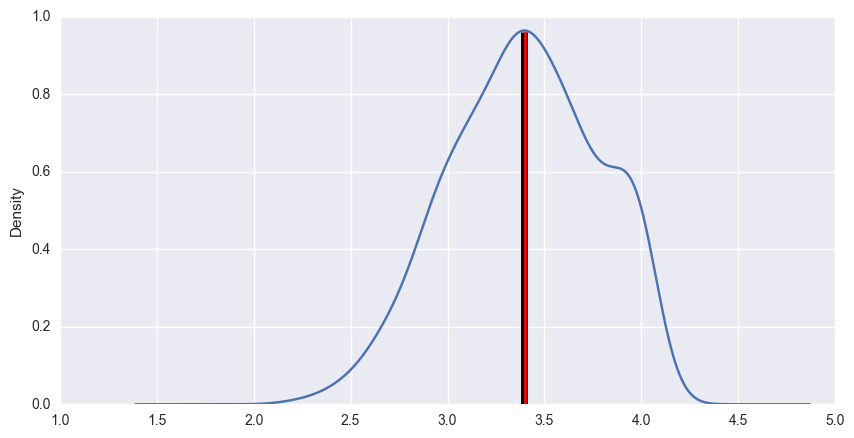

In [11]:
df_dropped['gpa'].plot(kind="density", figsize=(10,5))

plt.vlines(df_dropped['gpa'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.96,
           linewidth=5.0)

plt.vlines(df_dropped['gpa'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.96, 
           linewidth=2.0,
           color="red");

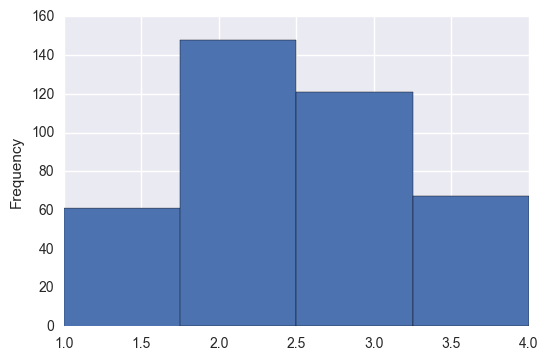

In [12]:
df_dropped['prestige'].plot.hist(bins = 4)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, appears to be slight positive skewness for gre and negative skew for gpa and prestige. Could use .skew() to further evaluate df_dropped. We would want to correct given the model assumption of normal distribution. As far as how, we would want to consider various transformation options.  

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
df_dropped.corr(method = 'pearson')

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


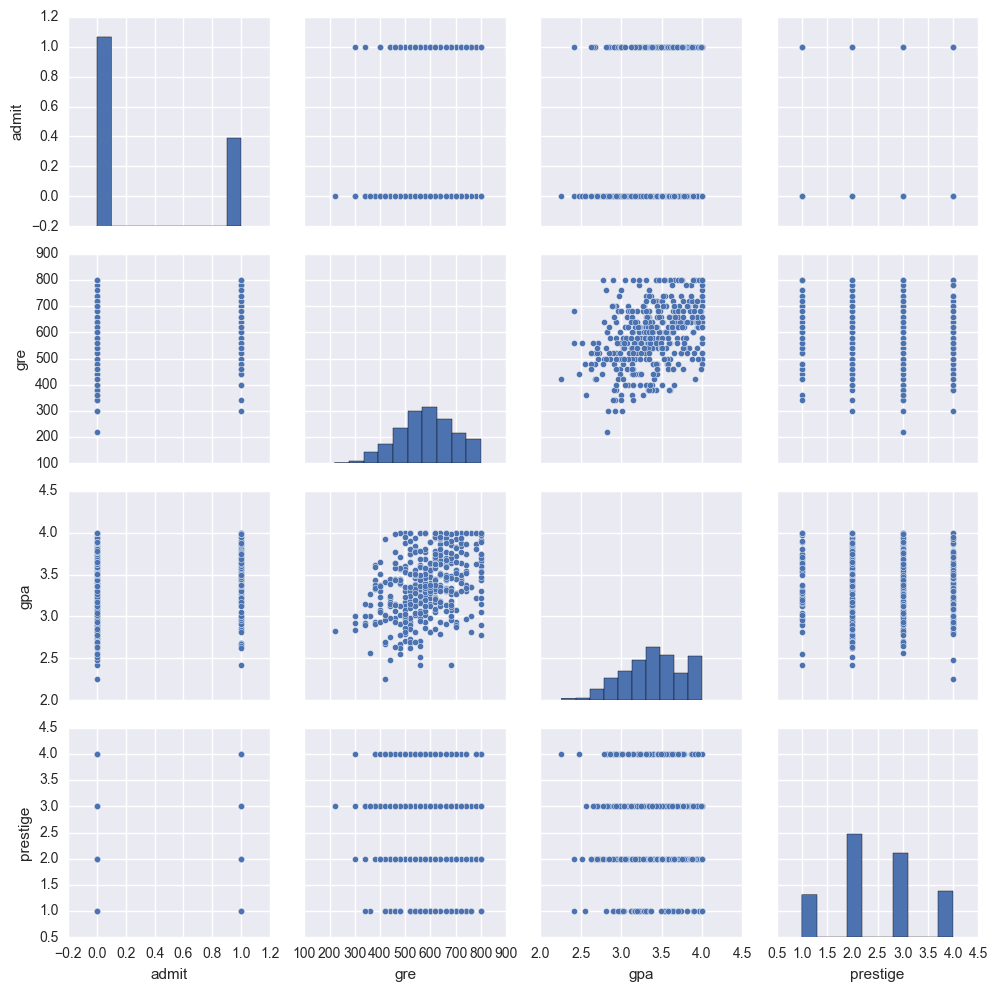

In [15]:
import seaborn as sns
sns.pairplot(df_dropped)

#### Question 12. What did you find?

Answer: In regards to the predictor variables, under the Pearson method, GRE ~ GPA has the highest correlation at 0.382 which is still a weak positive relationship. Prestige technically has a negative relationship with GRE and GPA, however, at -0.124 and -0.061, respectively, both show effectively no linear relationship. Admit technically has a relatively weak negative relationship with prestige at -.24 and a relatively weak positive relationship with GRE and GPA at 0.181 and 0.174, respectively.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Read admissions.csv data to pandas and create a DataFrame, follow the below to understand how representative our sample is to the population.
2. Apply pandas describe method to generate summary statistics to evaluate count, mean, std, min, max, quartiles, etc., for admit and prestige variables.
3. Visualize prestige with histograms to better understand distribution, evaluate skewness.

#### Question 14. What is your hypothesis? 

Answer: If grad school admission rates and prestige of undergraduate schools are related, then higher prestige will result in a greater likelihood of admission. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Could select rows of df where various series are not NaN.

#### 2. Bonus: Log transform the skewed data

In [18]:
np.log(df_dropped['gre'])

0      5.940171
1      6.492240
2      6.684612
3      6.461468
4      6.253829
5      6.633318
6      6.327937
7      5.991465
8      6.291569
9      6.551080
10     6.684612
11     6.086775
12     6.633318
13     6.551080
14     6.551080
15     6.173786
16     6.659294
17     5.886104
18     6.684612
19     6.291569
20     6.214608
21     6.492240
22     6.396930
23     6.522093
24     6.633318
25     6.684612
26     6.429719
27     6.253829
28     6.659294
29     6.253829
         ...   
370    6.291569
371    6.522093
372    6.522093
373    6.429719
374    6.327937
375    6.327937
376    6.429719
377    6.684612
378    6.461468
379    6.291569
380    6.551080
381    6.291569
382    6.291569
383    6.492240
384    6.173786
385    6.040255
386    6.606650
387    6.363028
388    6.461468
389    6.461468
390    6.684612
391    6.492240
392    6.396930
393    6.429719
394    6.131226
395    6.429719
396    6.327937
397    6.131226
398    6.551080
399    6.396930
Name: gre, dtype: float6

#### 3. Advanced: Impute missing data

You could use .fillna() to fill NaN values using specified method (backfill, bfill, pad, ffill, etc.)

In [ ]:
df_fillna = df_raw.fillna(0)
df_fillna.describe()